### Exercises

#### 1. What are the advantages of a CNN over a fully connected DNN for image classification?
**Answer:**
- **Parameter Sharing**: CNNs use shared weights in convolutional layers, which means the same filter (or set of filters) is used across different parts of the input. This greatly reduces the number of parameters compared to fully connected layers.
- **Sparsity of Connections**: In CNNs, each neuron is connected only to a local region of the input, reducing the number of connections and parameters.
- **Translation Invariance**: CNNs can detect features regardless of their position in the image, thanks to the nature of convolution operations.
- **Hierarchical Feature Learning**: CNNs automatically learn to detect low-level features (like edges) in the initial layers and high-level features (like objects) in deeper layers.

#### 2. Consider a CNN composed of three convolutional layers, each with 3 × 3 kernels, a stride of 2, and "same" padding. The lowest layer outputs 100 feature maps, the middle one outputs 200, and the top one outputs 400. The input images are RGB images of 200 × 300 pixels.
**Answer:**

1. **First Convolutional Layer**:
   - Input: 200 x 300 x 3
   - Stride: 2
   - "Same" padding ensures the output size is \( $\lceil \frac{\text{input size}}{2} \rceil$ \)
   - Output size (height, width): \( $\lceil \frac{200}{2} \rceil \times \lceil \frac{300}{2} \rceil$ \) = 100 x 150
   - Output: 100 x 150 x 100 (100 feature maps)
   
2. **Second Convolutional Layer**:
   - Input: 100 x 150 x 100
   - Stride: 2
   - Output size (height, width): \( $\lceil \frac{100}{2} \rceil \times \lceil \frac{150}{2} \rceil$ \) = 50 x 75
   - Output: 50 x 75 x 200 (200 feature maps)
   
3. **Third Convolutional Layer**:
   - Input: 50 x 75 x 200
   - Stride: 2
   - Output size (height, width): \( $\lceil \frac{50}{2} \rceil \times \lceil \frac{75}{2} \rceil$ \) = 25 x 38
   - Output: 25 x 38 x 400 (400 feature maps)

##### Total Number of Parameters in the CNN:

1. **First Convolutional Layer**:
   - Number of filters: 100
   - Filter size: \(3 $\times$ 3 $\times$ 3\)
   - Parameters per filter: \(3 $\times$ 3 $\times$ 3 = 27\)
   - Total parameters (including biases): \(100 $\times$ (27 + 1) = 2800\)

2. **Second Convolutional Layer**:
   - Number of filters: 200
   - Filter size: \(3 $\times$ 3 $\times$ 100\)
   - Parameters per filter: \(3 $\times$ 3 $\times$ 100 = 900\)
   - Total parameters (including biases): \(200 $\times$ (900 + 1) = 180200\)

3. **Third Convolutional Layer**:
   - Number of filters: 400
   - Filter size: \(3 $\times$ 3 $\times$ 200\)
   - Parameters per filter: \(3 $\times$ 3 $\times$ 200 = 1800\)
   - Total parameters (including biases): \(400 $\times$ (1800 + 1) = 720400\)

- **Total parameters in the CNN**: \(2800 + 180200 + 720400 = 903400\)

##### RAM Requirement for a Single Instance:

- **Input image size**: \(200 $\times$ 300 $\times$ 3 = 180000\)
- **First layer output size**: \(100 $\times$ 150 $\times$ 100 = 1500000\)
- **Second layer output size**: \(50 $\times$ 75 $\times$ 200 = 750000\)
- **Third layer output size**: \(25 $\times$ 38 $\times$ 400 = 380000\)

- **Total activations**: \(180000 + 1500000 + 750000 + 380000 = 2810000\)

- **Total activations in bytes (32-bit float = 4 bytes)**: \(2810000 $\times$ 4 = 11240000\) bytes = 11.24 MB

- **Parameters in bytes**: \(903400 $\times$ 4 = 3613600\) bytes = 3.61 MB

- **Total RAM for a single instance**: \(11.24 + 3.61 = 14.85\) MB

##### RAM Requirement for a Mini-Batch of 50 Images:

- **Activations for 50 images**: \(2810000 $\times$ 50 = 140500000\)
- **Activations in bytes**: \(140500000 $\times$ 4 = 562000000\) bytes = 562 MB
- **Parameters remain the same**: 3.61 MB

- **Total RAM for a mini-batch of 50 images**: \(562 + 3.61 = 565.61\) MB

##### Summary:

- **Total parameters in the CNN**: 903,400
- **Total RAM for a single instance**: 14.85 MB
- **Total RAM for a mini-batch of 50 images**: 565.61 MB


#### 3. If your GPU runs out of memory while training a CNN, what are five things you could try to solve the problem?
**Answer:**
1. **Reduce the Mini-Batch Size**: Decreasing the number of samples in each mini-batch reduces memory usage.
2. **Use Model Checkpointing**: Save intermediate states and use gradient checkpointing to recompute parts of the model during backpropagation instead of storing all intermediate activations.
3. **Reduce the Input Image Size**: Decreasing the resolution of input images lowers memory requirements.
4. **Simplify the Model**: Reduce the number of layers or the number of filters per layer to decrease the model size.
5. **Use Mixed Precision Training**: Train the model with mixed precision (using both 16-bit and 32-bit floating point numbers) to save memory.

#### 4. Why would you want to add a max pooling layer rather than a convolutional layer with the same stride?
**Answer:**
- **Dimensionality Reduction**: Max pooling reduces the spatial dimensions of the input, which decreases the computational load and memory usage.
- **Feature Selection**: Max pooling helps retain the most prominent features while discarding less important ones, which can improve generalization.
- **Translation Invariance**: Max pooling introduces a degree of translational invariance, helping the network recognize objects regardless of minor positional changes.

#### 5. When would you want to add a local response normalization layer?
**Answer:**
- **Competitive Normalization**: Local response normalization (LRN) layers can help highlight significant features by normalizing the responses across neighboring neurons, making the network more sensitive to strong activations.
- **Improving Generalization**: LRN can improve generalization by reducing overfitting, especially in early layers of the network.
- **Used in Specific Architectures**: LRN layers were particularly popular in earlier architectures like AlexNet but are less commonly used in modern architectures.

#### 6. Can you name the main innovations in AlexNet, compared to LeNet-5? What about the main innovations in GoogLeNet, ResNet, SENet, and Xception?
**Answer:**
- **AlexNet**:
  - Deeper network with more filters per layer.
  - Use of ReLU activation functions instead of tanh or sigmoid.
  - Overlapping max pooling.
  - Dropout for regularization.
  - Data augmentation to reduce overfitting.
  - Use of GPUs for faster training.
  
- **GoogLeNet (Inception)**:
  - Inception modules that allow multiple convolutions with different kernel sizes to run in parallel.
  - Reduction in the number of parameters by using 1x1 convolutions.
  - Deep network with 22 layers.

- **ResNet**:
  - Introduction of residual connections (skip connections) to alleviate the vanishing gradient problem and enable training of very deep networks.
  - Identity mappings in skip connections to make the optimization easier.

- **SENet**:
  - Introduction of Squeeze-and-Excitation (SE) blocks that adaptively recalibrate channel-wise feature responses by explicitly modeling interdependencies between channels.
  
- **Xception**:
  - Extreme version of Inception, where Inception modules are replaced with depthwise separable convolutions.
  - Efficient combination of depthwise and pointwise convolutions to reduce computational cost while maintaining performance.

#### 7. What is a fully convolutional network? How can you convert a dense layer into a convolutional layer?
**Answer:**
- **Fully Convolutional Network (FCN)**: A network composed entirely of convolutional layers, without any dense (fully connected) layers, typically used for tasks like semantic segmentation where spatial information must be preserved throughout the network.
  
- **Converting a Dense Layer to a Convolutional Layer**:
  - A dense layer with \(n\) neurons can be replaced by a convolutional layer with \(n\) filters of size 1x1. This makes each output feature map correspond to a single neuron in the dense layer while maintaining the spatial dimensions of the input.

#### 8. What is the main technical difficulty of semantic segmentation?
**Answer:**
- **Precise Localization**: Semantic segmentation requires precise pixel-level classification, which is challenging because it demands accurate spatial information throughout the network. Maintaining high-resolution features and combining contextual information effectively while preserving spatial details is technically difficult. This often requires a combination of downsampling for context and upsampling (with techniques like deconvolution or unpooling) to restore spatial resolution.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 9. Build your own CNN from scratch and try to achieve the highest possible accuracy on MNIST.

In [2]:
%cd "/content/drive/Othercomputers/My laptop/Documents/Hands-On Machine Learning with Scikit-Learn and TensorFlow"

/content/drive/Othercomputers/My laptop/Documents/Hands-On Machine Learning with Scikit-Learn and TensorFlow


In [3]:
from utils import set_seed
import os

set_seed()

ROOT_DIR = './'
datapath = os.path.join(ROOT_DIR, 'datasets')
os.makedirs(datapath, exist_ok=True)

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the MNIST dataset using tfds
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train[:80%]', 'train[80%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    data_dir=datapath
)


##### Normalize the data (0-1)

In [11]:
# Normalize, resize, and convert images to RGB
def preprocess_img(image, label):
    """Normalizes images: `uint8` -> `float32`"""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(preprocess_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)


##### Helper funcion to visualize the data

In [12]:
import matplotlib.pyplot as plt

# Function to visualize a batch of images
def visualize_batch(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

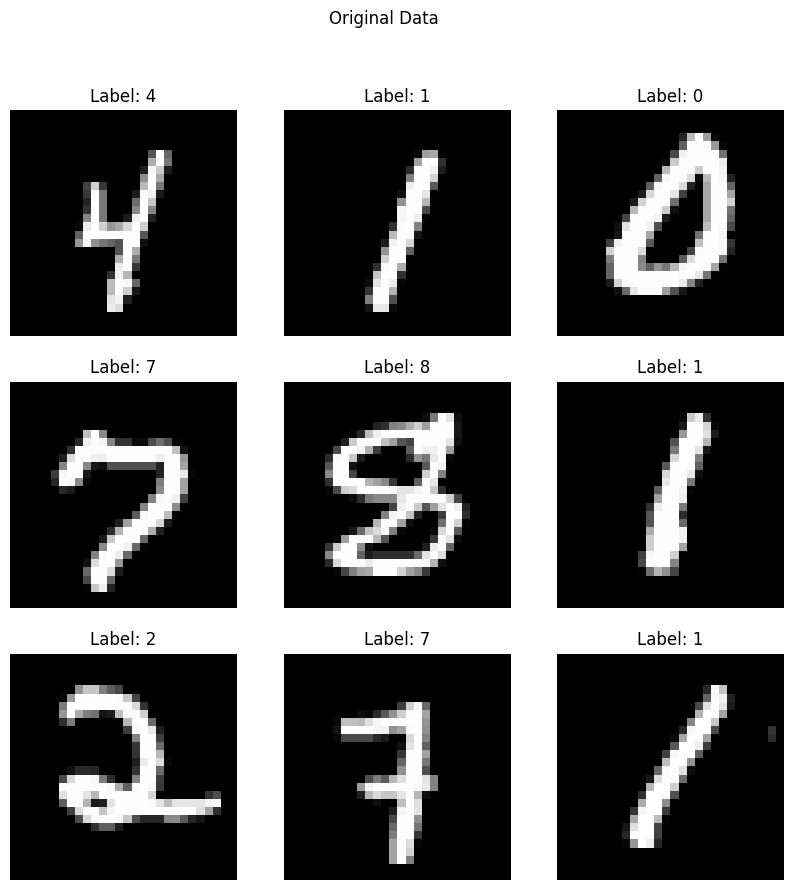

In [13]:
# Visualize the original data
for images, labels in ds_train.batch(9).take(1):
    visualize_batch(images, labels, "Original Data")

##### Create the augmentation pipeline and augmentation function

In [14]:
# Set up the data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomBrightness(.2, value_range=(0., 1.))
])

In [15]:
# Apply data augmentation to the dataset
def augment(image, label):
    image = data_augmentation(image, training=True)
    return image, label

##### Augment the data

In [16]:
ds_train_augmented = ds_train.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val_augmented = ds_val.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)


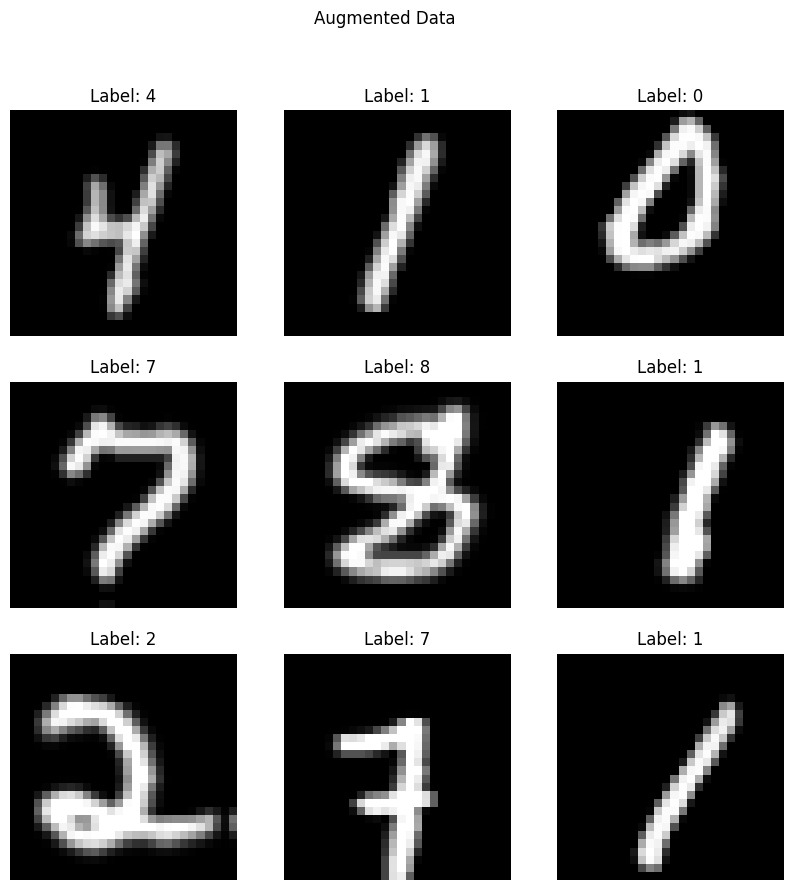

In [17]:
# Visualize the augmented data
for images, labels in ds_train_augmented.batch(9).take(1):
    visualize_batch(images, labels, "Augmented Data")

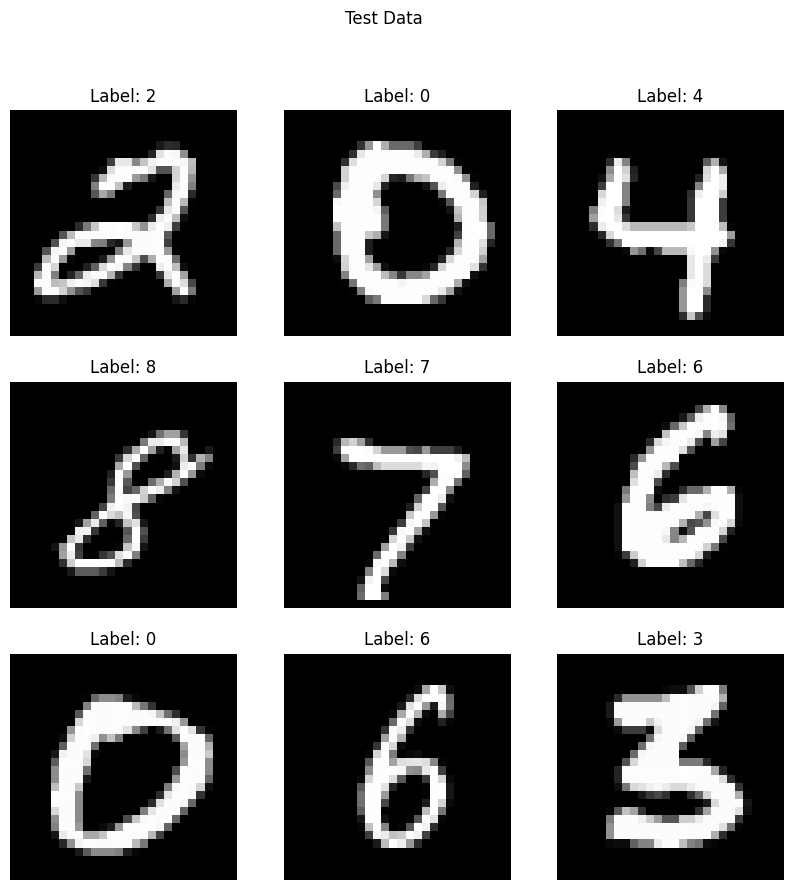

In [18]:
for images, labels in ds_test.batch(9).take(1):
    visualize_batch(images, labels, "Test Data")

In [19]:
# Batch and prefetch the datasets
batch_size = 32
ds_train_augmented = ds_train_augmented.shuffle(10000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
ds_val_augmented = ds_val_augmented.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


In [20]:
ds_test = ds_test.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

##### Build the model

In [21]:
from utils import get_chapter_directory

chapter_dir = get_chapter_directory(14)
chapter_dir = os.path.join(ROOT_DIR, chapter_dir)

In [22]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(chapter_dir + '/simple_cnn.h5', save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=chapter_dir + '/logs')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(ds_train_augmented, epochs=20, validation_data=ds_val_augmented, callbacks=[early_stopping, model_checkpoint, tensorboard_cb, reduce_lr])

Epoch 1/20
1491/1500 [============================>.] - ETA: 0s - loss: 0.2963 - accuracy: 0.9066

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 51s 27ms/step - loss: 0.2952 - accuracy: 0.9070 - val_loss: 0.1352 - val_accuracy: 0.9582 - lr: 0.0010
Epoch 2/20
1500/1500 [==============================] - 44s 26ms/step - loss: 0.1004 - accuracy: 0.9694 - val_loss: 0.0842 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 3/20
1500/1500 [==============================] - 38s 22ms/step - loss: 0.0743 - accuracy: 0.9769 - val_loss: 0.0657 - val_accuracy: 0.9791 - lr: 0.0010
Epoch 4/20
1500/1500 [==============================] - 38s 22ms/step - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.0525 - val_accuracy: 0.9839 - lr: 0.0010
Epoch 5/20
1500/1500 [==============================] - 42s 24ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0603 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 6/20
1500/1500 [==============================] - 41s 25ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0556 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 7/20
1500/1500 [==============================] - 3

In [24]:
model.evaluate(ds_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0210 - accuracy: 0.9936


[0.020988943055272102, 0.9936000108718872]

In [25]:
import gc
# Clear TensorFlow session
tf.keras.backend.clear_session()

# Trigger garbage collection
gc.collect()


93510

#### 10. Use transfer learning for large image classification




1.   Download the CIFAR dataset



In [26]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train[:80%]', 'train[80%:]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
    data_dir=datapath
)

In [27]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [28]:
# Batch and prefetch the datasets
batch_size = 32
ds_train = ds_train.cache().shuffle(10000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
ds_val = ds_val.cache().batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [29]:
ds_test = ds_test.batch(batch_size).cache().prefetch(tf.data.experimental.AUTOTUNE)

In [34]:
n_classes = ds_info.features['label'].num_classes
n_classes

100

In [35]:
input_shape = ds_info.features['image'].shape
input_shape

(32, 32, 3)

In [36]:
base_model = tf.keras.applications.EfficientNetB7(weights="imagenet", include_top=False, input_shape=input_shape)

258076736/258076736 [==============================] - 1s 0us/step


In [39]:
image_batch, label_batch = next(iter(ds_train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1, 1, 2560)


In [37]:
for layer in base_model.layers:
 layer.trainable = False

In [38]:
base_model.summary()

Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 32, 32, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 32, 32, 3)            0         ['normalization[0

In [42]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2560)


In [43]:
prediction_layer = tf.keras.layers.Dense(n_classes, activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 100)


In [40]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input

In [52]:
preprosessed_batch = preprocess_input(image_batch)
print(preprosessed_batch.shape)
print(preprosessed_batch)

(32, 32, 32, 3)
tf.Tensor(
[[[[ 51 169 209]
   [ 42 161 201]
   [ 48 169 208]
   ...
   [ 48 157 194]
   [ 48 156 189]
   [ 44 140 170]]

  [[ 54 172 213]
   [ 51 168 209]
   [ 59 180 219]
   ...
   [ 42 149 188]
   [ 33 138 175]
   [ 35 135 168]]

  [[ 54 171 213]
   [ 59 174 215]
   [ 62 185 224]
   ...
   [ 35 146 184]
   [ 27 134 173]
   [ 33 138 175]]

  ...

  [[115 190 224]
   [115 189 223]
   [104 188 220]
   ...
   [ 56 167 208]
   [ 59 168 204]
   [ 81 169 206]]

  [[112 190 227]
   [116 186 223]
   [109 187 219]
   ...
   [ 62 171 209]
   [ 64 170 206]
   [ 73 166 203]]

  [[102 182 221]
   [110 180 218]
   [109 184 218]
   ...
   [ 64 170 207]
   [ 68 170 207]
   [ 69 165 201]]]


 [[[ 91 127 169]
   [ 82 116 152]
   [ 55  87 119]
   ...
   [ 51  68  84]
   [ 64  84  98]
   [ 70  94 105]]

  [[ 89 130 172]
   [ 89 127 164]
   [ 76 112 145]
   ...
   [ 24  39  44]
   [ 32  48  55]
   [ 58  77  87]]

  [[ 86 129 172]
   [ 84 124 162]
   [ 88 127 161]
   ...
   [ 24  36  34]
 

In [44]:
inputs = tf.keras.Input(shape=input_shape)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = prediction_layer(x)
model = tf.keras.Model(inputs=inputs, outputs=output)

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb7 (Functional  (None, 1, 1, 2560)        64097687  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 2560)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 100)               256100    
                                                                 
Total params: 64353787 (245.49 MB)
Trainable params: 256100 (

In [46]:
len(model.trainable_variables)

2

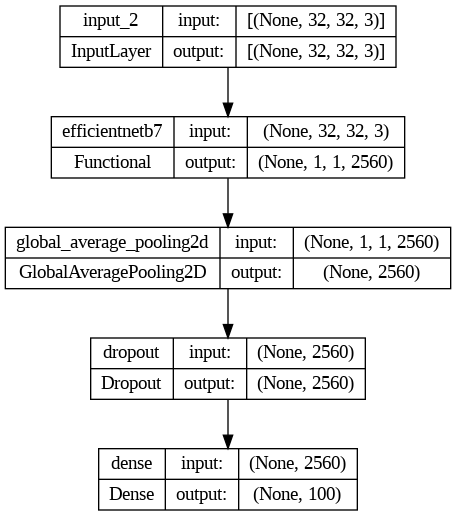

In [47]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [48]:
# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(chapter_dir + 'cifar100/EfficientNetB6.h5', save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=chapter_dir + 'cifar100/logs')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)


In [49]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=.2)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(ds_val)

313/313 [==============================] - 23s 40ms/step - loss: 8.1923 - accuracy: 0.0095


In [ ]:
# Train the model
history = model.fit(ds_train, epochs=20, validation_data=ds_val, callbacks=[early_stopping, model_checkpoint, tensorboard_cb, reduce_lr])

Epoch 1/20
1250/1250 [==============================] - 63s 50ms/step - loss: 50.3262 - accuracy: 0.1215 - val_loss: 31.1782 - val_accuracy: 0.1849 - lr: 7.8125e-04
Epoch 2/20
1250/1250 [==============================] - 64s 51ms/step - loss: 49.7998 - accuracy: 0.1207 - val_loss: 30.0470 - val_accuracy: 0.1950 - lr: 7.8125e-04
Epoch 3/20
1249/1250 [============================>.] - ETA: 0s - loss: 49.7902 - accuracy: 0.1188